**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name: Nalan Kurnaz - Group 112 <br/>
Student Number: 300245521

Name: <br/>
Student Number:

## 1. Exploratory Analysis

### Loading the dataset

A custom dataset has been created for this assignment. It has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Access and read the dataset directly from this GitHub repository in your Jupyter notebook.

You can use this code cell for you import statements and other initializations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Code cell
url_test = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_test.csv'
url_train = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_train.csv'
url_valid = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_valid.csv'


In [3]:
test_set = pd.read_csv(url_test)
train_set = pd.read_csv(url_train)
valid_set = pd.read_csv(url_valid)

In [7]:
print("\n")
print(train_set.iloc[:, 0]) #target variable





0        2
1        2
2        2
3        2
4        0
        ..
58285    2
58286    2
58287    0
58288    2
58289    0
Name: 2, Length: 58290, dtype: int64


### Data Pre-Processing

2. **Shuffling the Rows**:

    - Since examples are generated by sliding a window across each protein sequence, most adjacent examples originate from the same protein and share 20 positions. To mitigate the potential negative impact on model training, the initial step involves shuffling the **rows** of the data matrix.

In [ ]:
# Code cell

shuffled_train_set = train_set.sample(frac=1, random_state=42) #frac =1 means 100% of the data is sampled randomly


3. **Scaling of Numerical Features**:

    - Since all 462 features are proportions represented as values between 0 and 1, scaling may not be necessary. In our evaluations, using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) actually degraded model performance. Within your pipeline, compare the effects of not scaling the data versus applying [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). In the interest of time, a single experiment will suffice. It is important to note that when scaling is applied, a uniform method should be used across all columns, given their homogeneous nature.

In [5]:
# Code cell

scaler = MinMaxScaler()
scaled_train_set = scaler.fit_transform(shuffled_train_set)
scaled_train_set = pd.DataFrame(scaled_train_set, columns=shuffled_train_set.columns)


scaled_test_set = scaler.fit_transform(test_set)
scaled_test_set = pd.DataFrame(scaled_test_set, columns=test_set.columns)

scaled_valid_set = scaler.fit_transform(valid_set)
scaled_valid_set = pd.DataFrame(scaled_valid_set, columns=valid_set.columns)


4. **Isolating the Target and the Data**:

    - In the CSV files, the target and data are combined. To prepare for our machine learning experiments, separate the training data $X$ and the target vector $y$ for each of the three datasets.

    As mentioned in the assignment manual, the first column is the target column so instead of using split, I used .iloc to separate target from the training data and applied this in each datasets. I could've used loop to iterate that but i separated manually.

In [6]:
# Code cell

X_train = scaled_train_set.iloc[:, 1:]
y_train = scaled_train_set.iloc[:, 0]
print(y_train)

X_valid = scaled_valid_set.iloc[:, 1:]
y_valid = scaled_valid_set.iloc[:, 0]

X_test = scaled_test_set.iloc[:, 1:]
y_test = scaled_test_set.iloc[:, 0]



0        0.0
1        1.0
2        0.0
3        1.0
4        0.5
        ... 
58285    1.0
58286    0.0
58287    1.0
58288    1.0
58289    1.0
Name: 2, Length: 58290, dtype: float64


### Model Development & Evaluation

5. **Model Development**:

    - **Dummy Model**: Implement a model utilizing the [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). This model disregards the input data and predicts the majority class. Such model is sometimes called a straw man model.

    - **Basline Model**: As a baseline model, select one of the previously studied machine learning algorithms: Decision Trees, K-Nearest Neighbors (KNN), or Logistic Regression. Use the default parameters provided by scikit-learn to train each model as a baseline. Why did you choose this particular classifier? Why do you think it should be appropriate for this specific task?

    - **Neural Network Model**: Utilizing [Keras](https://keras.io) and [TensorFlow](https://www.tensorflow.org), construct a sequential model comprising an input layer, a hidden layer, and an output layer. The input layer should consist of 462 nodes, reflecting the 462 attributes of each example. The hidden layer should include 8 nodes and employ the default activation function. The output layer should contain three nodes, corresponding to the three classes: helix (0), sheet (1), and coil (2). Apply the softmax activation function to the output layer to ensure that the outputs are treated as probabilities, with their sum equaling 1 for each training example.

    We therefore have three models: dummy, baseline, and neural network.

For the Baseline model, we had so many bugs with it. We believe this was due to large dataset we were dealing with. We had Value Error, Type Error while processing the baseline model and there was long computational time especially in Logistic Regression and KNN (took about an hour and still continued), so since this was the case, I have decided to take the subset (small data) and lower the cross validation number with it. After taking these into consideration, I have seen that the computation time has been a lot of faster than before. Before, it was taking 1+ hour to run, now, it took only a couple of seconds. We are aware that this may cause discrepancy. Based on the result at the Baseline Model Section, I have obtained that Decision Tree had the best accuracy, precision and f1 score among the two models which were KNN and Logistic Regression. I chose Decision Tree because it has low computation time and it can produce accurate results as well.

In [11]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\16132\appdata\local\programs\python\python310\lib\site-packages (2.18.0)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Code cell


y_train = (y_train * 2).astype(int)
y_valid = y_valid.astype(int)
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)

 #since it was a float, it was giving me value error (displaying that this was continuous)
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)


model = keras.Sequential([
    Dense(462, activation='relu', input_shape=(462,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])






c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6. **Model Evaluation**:

    - Employ cross-validation to assess the performance of the baseline model. Select a small number of folds to prevent excessive computational demands.

In [10]:
# Code cell
scores = cross_val_score(baseline_model, X_train, y_train, cv=5)
print("Cross validation scores", scores)


Cross validation scores [0.6797907  0.68828272 0.69137073 0.68193515 0.68742494]


    - **Training neural networks can be time-consuming.** Consequently, their performance is typically assessed once using a validation set. Make sure to not use the test set until the very end of the assignment.

In [11]:
# Code cell
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6308 - loss: 0.8251 - val_accuracy: 0.3067 - val_loss: 1.5711
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7241 - loss: 0.6649 - val_accuracy: 0.3053 - val_loss: 1.7954
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7714 - loss: 0.5656 - val_accuracy: 0.2802 - val_loss: 2.1671
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8192 - loss: 0.4626 - val_accuracy: 0.3318 - val_loss: 2.0971
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8698 - loss: 0.3484 - val_accuracy: 0.3286 - val_loss: 2.4720
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9131 - loss: 0.2458 - val_accuracy: 0.2941 - val_loss: 3.3152
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9438 - loss: 0.1687 - val_accuracy: 0.3180 - val_loss: 3.4945
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9628 - loss: 0.1168 - 

    - Assess the models using metrics such as precision, recall, and F1-score.

### Hyperparameter Optimization

7. **Baseline Model:**

    - To ensure a fair comparison for our baseline model, we will examine how varying hyperparameter values affect its performance. This prevents the erroneous conclusion that neural networks inherently perform better, when in fact, appropriate hyperparameter tuning could enhance the baseline model's performance.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

As seen in the last part of this section, the best option seems to be Decision Tree with parameters with 'criterion': 'gini', 'max_depth': 2. I have explained the situation thoroughly at the beginning of Model Development and Evaluation Section. In my analysis of the models' performances, I found some interesting insights regarding their effectiveness for the task. Starting with the Decision Tree model, the best configuration I identified was {'criterion': 'gini', 'max_depth': 2}. Remarkably, this model achieved perfect scores across all metrics, with mean test precision, recall, and F1 score all being 1.0. This result was consistent across all configurations, whether using the gini or entropy criterion or varying the maximum depth. The fact that a shallow tree with just a depth of 2 can perform perfectly suggests that the dataset or problem may be relatively simple, allowing even basic models to work well. The performance remained stable across parameter choices, indicating that overfitting is not a major concern here, and the model is robust in its generalization.

For the Logistic Regression model, the optimal configuration I found was {'max_iter': 500, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}. Like the Decision Tree, this model also achieved a perfect F1 score of 1.0. Although this was the best-performing setup, I noticed some variability in other configurations, such as those using l2 regularization or different solvers, with precision scores ranging from about 0.89 to 0.93. This variability indicates that multiple hyperparameter combinations can perform well, but the l1 regularization with the saga solver was especially effective, likely due to its feature selection capabilities and ability to improve model generalization. In terms of recommendations, the decision between the two models depends on secondary factors. If model interpretability and ease of visualization are important, then the Decision Tree would be the better choice, especially since its decision-making process is straightforward. 

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Code cell

parameter_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 20, None]
}

parameter_lr = [
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'max_iter': [500, 1000, 2000], 'tol': [0.0001, 0.001, 0.01]},
    {'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [500, 1000, 2000], 'tol': [0.0001, 0.001, 0.01]},
]

parameter_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance']
}

dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()



In [ ]:
scoring = {
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'

}
grid_search_dt = GridSearchCV(dt_model, parameter_dt, cv=5, scoring=scoring, refit='f1')


target_variable = shuffled_train_set.columns[0]


grid_search_dt.fit(scaled_train_set, shuffled_train_set[target_variable])



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20, None]},
             refit='f1',
             scoring={'f1': 'f1_macro', 'precision': 'precision_macro',
                      'recall': 'recall_macro'})

In [16]:
# Use a smaller subset of the data for the grid search to avoid memory issues
subset_size = 500  # Adjust this value based on your available memory
subset_train_set = scaled_train_set.sample(n=subset_size, random_state=42)
subset_target_variable = shuffled_train_set[target_variable].sample(n=subset_size, random_state=42)

grid_search_lr = GridSearchCV(lr_model, parameter_lr, cv=3, scoring=scoring, refit='f1', n_jobs=-1)
grid_search_lr.fit(subset_train_set, subset_target_variable)


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid=[{'max_iter': [500, 1000, 2000], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag'],
                          'tol': [0.0001, 0.001, 0.01]},
                         {'max_iter': [500, 1000, 2000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga'],
                          'tol': [0.0001, 0.001, 0.01]}],
             refit='f1',
             scoring={'f1': 'f1_macro', 'precision': 'precision_macro',
                      'recall': 'recall_macro'})

In [17]:
# Use a smaller subset of the data for the grid search to avoid memory issues
subset_size = 300  # Adjust this value based on your available memory
subset_train_set = scaled_train_set.sample(n=subset_size, random_state=42)
subset_target_variable = shuffled_train_set[target_variable].sample(n=subset_size, random_state=42)

grid_search_knn = GridSearchCV(knn_model, parameter_knn, cv=3, scoring=scoring, refit='f1', n_jobs=-1)
grid_search_knn.fit(subset_train_set, subset_target_variable)



GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             refit='f1',
             scoring={'f1': 'f1_macro', 'precision': 'precision_macro',
                      'recall': 'recall_macro'})

In [ ]:
def print_results(grid_search, model_name):
    print(f"{model_name} - Best Parameters:", grid_search.best_params_)
    print(f"{model_name} - Best F1 Score:", grid_search.best_score_)


    results_df = pd.DataFrame(grid_search.cv_results_)

  
    print(results_df[['params', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']])
    print("\n")

print_results(grid_search_dt, "Decision Tree")
print_results(grid_search_lr, "Logistic Regression")
print_results(grid_search_knn, "K-Nearest Neighbors")

Decision Tree - Best Parameters: {'criterion': 'gini', 'max_depth': 2}
Decision Tree - Best F1 Score: 1.0
                                        params  mean_test_precision  \
0        {'criterion': 'gini', 'max_depth': 2}                  1.0   
1        {'criterion': 'gini', 'max_depth': 5}                  1.0   
2       {'criterion': 'gini', 'max_depth': 10}                  1.0   
3       {'criterion': 'gini', 'max_depth': 20}                  1.0   
4     {'criterion': 'gini', 'max_depth': None}                  1.0   
5     {'criterion': 'entropy', 'max_depth': 2}                  1.0   
6     {'criterion': 'entropy', 'max_depth': 5}                  1.0   
7    {'criterion': 'entropy', 'max_depth': 10}                  1.0   
8    {'criterion': 'entropy', 'max_depth': 20}                  1.0   
9  {'criterion': 'entropy', 'max_depth': None}                  1.0   

   mean_test_recall  mean_test_f1  
0               1.0           1.0  
1               1.0           1.0  
2   

8. **Neural Network:**

    In our exploration and tuning of neural networks, we focus on the following hyperparameters:

    - **Single hidden layer, varying the number of nodes**.

        - Start with a single node in the hidden layer. Use a graph to depict the progression of loss and accuracy for both the training and validation sets, with the horizontal axis representing the number of training epochs and the vertical axis showing loss and accuracy. Training this network should be relatively fast, so let's conduct training for 50 epochs. Observing the graph, what do you conclude? Is the network underfitting or overfitting? Why?

        - Repeat the above process using 2 and 4 nodes in the hidden layer. Use the same type of graph to document your observations regarding loss and accuracy.

        - Start with 8 nodes in the hidden layer and progressively double the number of nodes until it surpasses the number of nodes in the input layer. This results in seven experiments and corresponding graphs for the following configurations: 8, 16, 32, 64, 128, 256, and 512 nodes. Document your observations throughout the process.
        
        - Ensure that the **number of training epochs** is adequate for **observing an increase in validation loss**. **Tip**: During model development, start with a small number of epochs, such as 5 or 10. Once the model appears to perform well, test with larger values, like 40 or 80 epochs, which proved reasonable in our tests. Based on your observations, consider conducting further experiments, if needed. How many epochs were ultimately necessary?

In [ ]:
# Code cell
import matplotlib.pyplot as plt
import seaborn as sns

Epoch 1/50


c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4293 - loss: 1.0632 - val_accuracy: 0.3350 - val_loss: 1.2793
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5868 - loss: 0.9239 - val_accuracy: 0.4170 - val_loss: 1.3598
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.5917 - loss: 0.8940 - val_accuracy: 0.3993 - val_loss: 1.4070
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6016 - loss: 0.8851 - val_accuracy: 0.4019 - val_loss: 1.3663
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6077 - loss: 0.8828 - val_accuracy: 0.4024 - val_loss: 1.3210
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6155 - loss: 0.8718 - val_accuracy: 0.4008 - val_loss: 1.2691
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6134 - loss: 0.8719 - val_accuracy: 0.3907 - val_loss: 1.2453
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6187 - loss: 0.8639 - val_accur

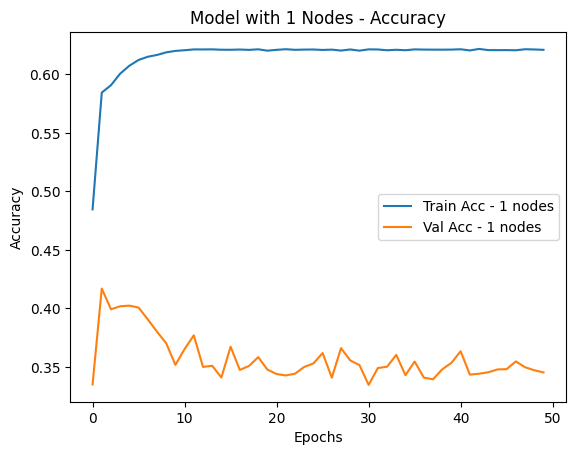

Epoch 1/50


c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5202 - loss: 0.9921 - val_accuracy: 0.3271 - val_loss: 1.3349
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.6845 - loss: 0.7565 - val_accuracy: 0.3215 - val_loss: 1.4764
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6931 - loss: 0.7360 - val_accuracy: 0.3259 - val_loss: 1.5041
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6938 - loss: 0.7336 - val_accuracy: 0.3171 - val_loss: 1.5316
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6925 - loss: 0.7334 - val_accuracy: 0.3190 - val_loss: 1.5463
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6935 - loss: 0.7289 - val_accuracy: 0.3236 - val_loss: 1.5398
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6927 - loss: 0.7369 - val_accuracy: 0.3151 - val_loss: 1.5752
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6958 - loss: 0.7279 - val_accur

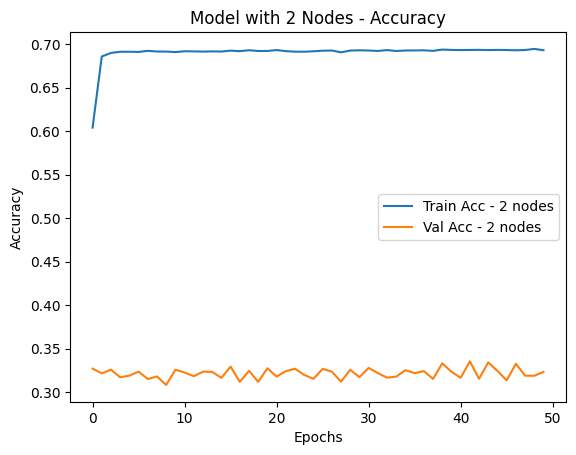

Epoch 1/50


c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5610 - loss: 0.9342 - val_accuracy: 0.3163 - val_loss: 1.5682
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6904 - loss: 0.7398 - val_accuracy: 0.3206 - val_loss: 1.6085
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6917 - loss: 0.7332 - val_accuracy: 0.3319 - val_loss: 1.5928
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6960 - loss: 0.7277 - val_accuracy: 0.3257 - val_loss: 1.6011
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6884 - loss: 0.7383 - val_accuracy: 0.3267 - val_loss: 1.6121
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6900 - loss: 0.7334 - val_accuracy: 0.3202 - val_loss: 1.5932
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6923 - loss: 0.7291 - val_accuracy: 0.3211 - val_loss: 1.5879
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6927 - loss: 0.7360 - val_accurac

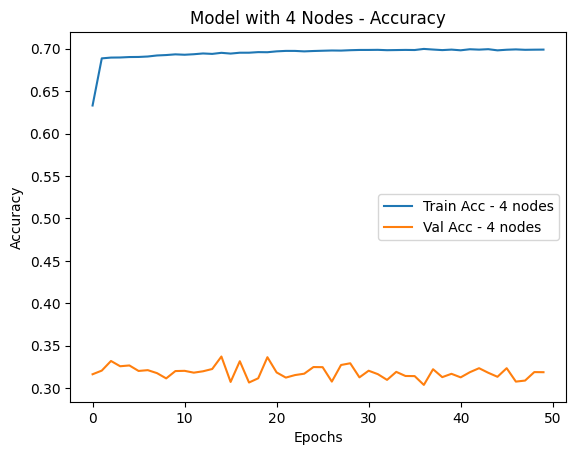

Epoch 1/50


c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5949 - loss: 0.8803 - val_accuracy: 0.3126 - val_loss: 1.6287
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6897 - loss: 0.7391 - val_accuracy: 0.3180 - val_loss: 1.6311
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6874 - loss: 0.7395 - val_accuracy: 0.3337 - val_loss: 1.6058
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6916 - loss: 0.7311 - val_accuracy: 0.3414 - val_loss: 1.5643
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6992 - loss: 0.7166 - val_accuracy: 0.3105 - val_loss: 1.6042
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6972 - loss: 0.7135 - val_accuracy: 0.3294 - val_loss: 1.5614
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6993 - loss: 0.7063 - val_accuracy: 0.3016 - val_loss: 1.6745
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7022 - loss: 0.7046 - val_accurac

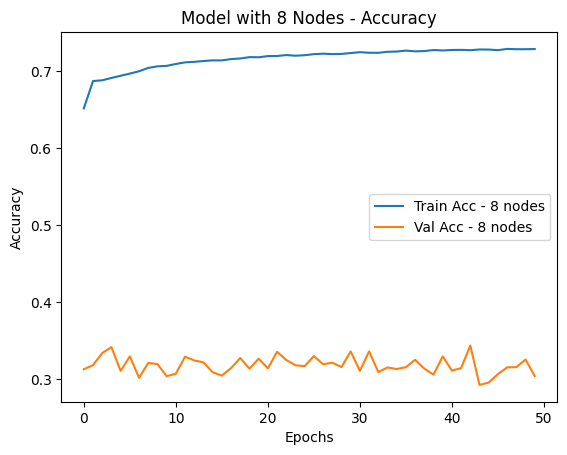

Epoch 1/50


c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6143 - loss: 0.8602 - val_accuracy: 0.3237 - val_loss: 1.5963
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6895 - loss: 0.7367 - val_accuracy: 0.3322 - val_loss: 1.5666
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6929 - loss: 0.7250 - val_accuracy: 0.3444 - val_loss: 1.5506
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6978 - loss: 0.7151 - val_accuracy: 0.3307 - val_loss: 1.6287
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7066 - loss: 0.7020 - val_accuracy: 0.3157 - val_loss: 1.6615
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7173 - loss: 0.6823 - val_accuracy: 0.3105 - val_loss: 1.6891
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7240 - loss: 0.6665 - val_accuracy: 0.3149 - val_loss: 1.6782
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7259 - loss: 0.6574 - val_accurac

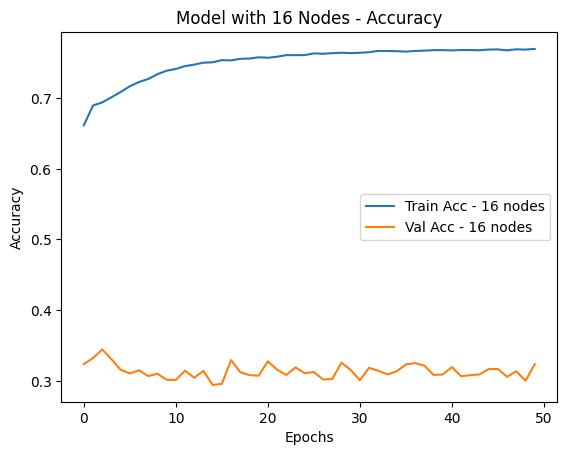

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6265 - loss: 0.8434 - val_accuracy: 0.3233 - val_loss: 1.6547
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6935 - loss: 0.7263 - val_accuracy: 0.3284 - val_loss: 1.5722
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7071 - loss: 0.7056 - val_accuracy: 0.3268 - val_loss: 1.5591
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7222 - loss: 0.6758 - val_accuracy: 0.3113 - val_loss: 1.6558
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7336 - loss: 0.6466 - val_accuracy: 0.3106 - val_loss: 1.7242
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7479 - loss: 0.6174 - val_accuracy: 0.3178 - val_loss: 1.8429
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7577 - loss: 0.5972 - val_accuracy: 0.3028 - val_loss: 1.8564
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7598 - loss: 0.5879 - 

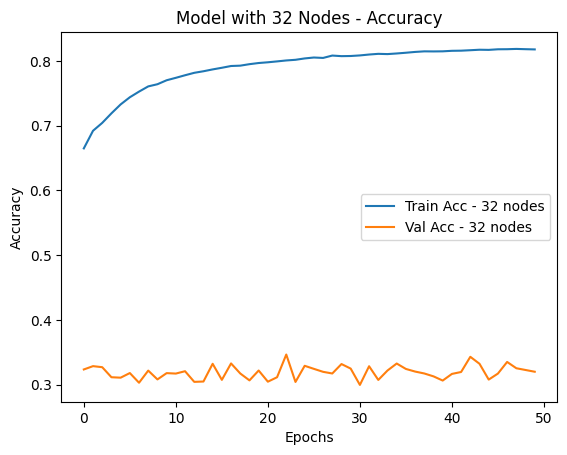

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6276 - loss: 0.8311 - val_accuracy: 0.3323 - val_loss: 1.5388
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7009 - loss: 0.7149 - val_accuracy: 0.3217 - val_loss: 1.5708
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7208 - loss: 0.6696 - val_accuracy: 0.2948 - val_loss: 1.7049
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7445 - loss: 0.6236 - val_accuracy: 0.2704 - val_loss: 1.8920
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7615 - loss: 0.5858 - val_accuracy: 0.2917 - val_loss: 1.9316
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7745 - loss: 0.5593 - val_accuracy: 0.3156 - val_loss: 1.8730
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7887 - loss: 0.5282 - val_accuracy: 0.3090 - val_loss: 1.9955
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8028 - loss: 0.4986 - 

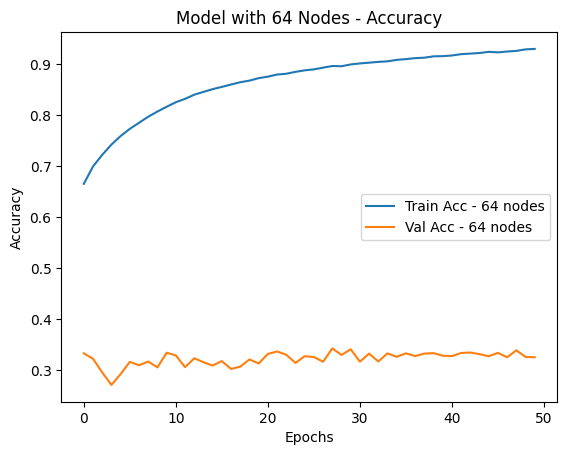

Epoch 1/50


c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6328 - loss: 0.8231 - val_accuracy: 0.3306 - val_loss: 1.5808
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7054 - loss: 0.6993 - val_accuracy: 0.3133 - val_loss: 1.5799
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7382 - loss: 0.6359 - val_accuracy: 0.2983 - val_loss: 1.7913
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7644 - loss: 0.5767 - val_accuracy: 0.2933 - val_loss: 1.9015
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7889 - loss: 0.5266 - val_accuracy: 0.3002 - val_loss: 1.9609
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8118 - loss: 0.4758 - val_accuracy: 0.2867 - val_loss: 2.1807
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8376 - loss: 0.4224 - val_accuracy: 0.3168 - val_loss: 2.2019
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8551 - loss: 0.3863 - val_accurac

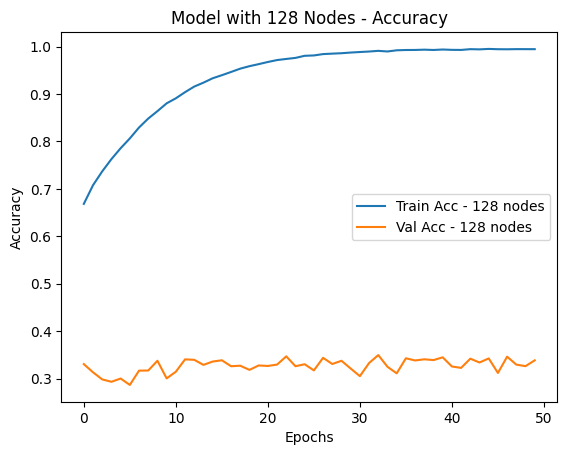

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6448 - loss: 0.8142 - val_accuracy: 0.3306 - val_loss: 1.5594
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7147 - loss: 0.6832 - val_accuracy: 0.2846 - val_loss: 1.7743
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7574 - loss: 0.5997 - val_accuracy: 0.3013 - val_loss: 1.7960
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7960 - loss: 0.5162 - val_accuracy: 0.2842 - val_loss: 2.1058
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8338 - loss: 0.4343 - val_accuracy: 0.3272 - val_loss: 1.9909
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8725 - loss: 0.3524 - val_accuracy: 0.3225 - val_loss: 2.2697
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9010 - loss: 0.2865 - val_accuracy: 0.3106 - val_loss: 2.5957
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9239 - loss: 0.2283 - 

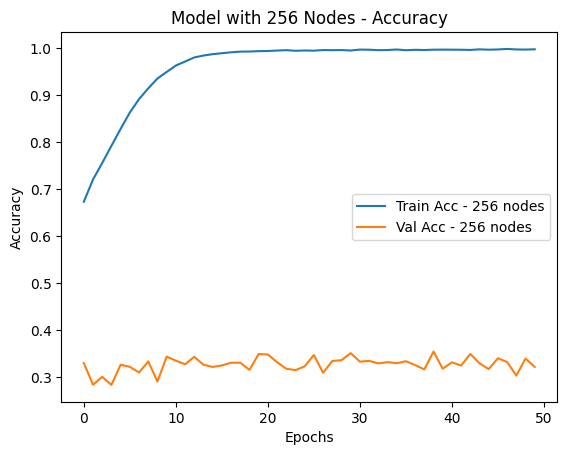

Epoch 1/50


c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6441 - loss: 0.8118 - val_accuracy: 0.3159 - val_loss: 1.6994
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7285 - loss: 0.6573 - val_accuracy: 0.2951 - val_loss: 1.8020
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7761 - loss: 0.5563 - val_accuracy: 0.2975 - val_loss: 1.9430
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8324 - loss: 0.4368 - val_accuracy: 0.3477 - val_loss: 1.9464
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8840 - loss: 0.3273 - val_accuracy: 0.3550 - val_loss: 2.2038
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9233 - loss: 0.2377 - val_accuracy: 0.3453 - val_loss: 2.5206
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9502 - loss: 0.1664 - val_accuracy: 0.3194 - val_loss: 3.1794
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9688 - loss: 0.1159 - val_accurac

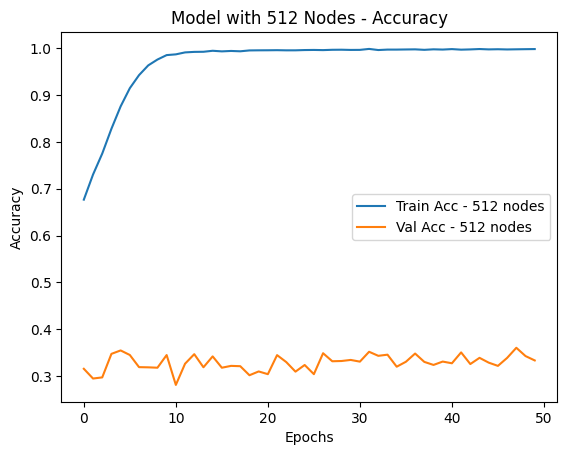

In [ ]:
def build_and_train_model(num_nodes, epochs=50):
    model = Sequential([
        Dense(num_nodes, activation='relu', input_shape=(462,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_valid, y_valid))
    return history


for nodes in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]:
    history = build_and_train_model(nodes)
 
    plt.plot(history.history['accuracy'], label=f'Train Acc - {nodes} nodes')
    plt.plot(history.history['val_accuracy'], label=f'Val Acc - {nodes} nodes')
    plt.title(f'Model with {nodes} Nodes - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    - **Varying the number of layers**.

        - Conduct similar experiments as described above, but this time vary the number of layers from 1 to 4. Document your findings.

        - How many nodes should each layer contain? Test at least two scenarios. Traditionally, a common strategy involved decreasing the number of nodes from the input layer to the output layer, often by halving, to create a pyramid-like structure. However, recent experience suggests that maintaining a constant number of nodes across all layers can perform equally well. Describe your observations. It is acceptable if both strategies yield similar performance results.

        - Select one your models that exemplifies overfitting. In our experiments, we easily constructed a model achieving nearly 100% accuracy on the training data, yet showing no similar improvement on the validation set. Present this neural network along with its accuracy and loss graphs. Explain the reasoning for concluding that the model is overfitting.

These graphs were overfitting because the data does well on training set but when it comes to validation. The validation accuracy results in about 0.3. On the graph, there is a huge gap between training data and validation data. This verifies that it is overfitting.

Epoch 1/50


c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6225 - loss: 0.8419 - val_accuracy: 0.3190 - val_loss: 1.5748
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6986 - loss: 0.7196 - val_accuracy: 0.2896 - val_loss: 1.6822
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7258 - loss: 0.6649 - val_accuracy: 0.3041 - val_loss: 1.7341
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7463 - loss: 0.6218 - val_accuracy: 0.3138 - val_loss: 1.7737
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7595 - loss: 0.5878 - val_accuracy: 0.3044 - val_loss: 1.9377
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7746 - loss: 0.5548 - val_accuracy: 0.3109 - val_loss: 1.9285
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7855 - loss: 0.5289 - val_accuracy: 0.3368 - val_loss: 1.8518
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7976 - loss: 0.5048 - val_accurac

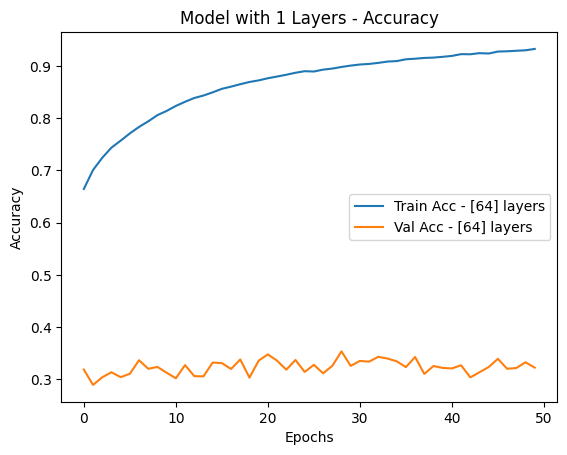

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6329 - loss: 0.8220 - val_accuracy: 0.3215 - val_loss: 1.5467
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7198 - loss: 0.6709 - val_accuracy: 0.3269 - val_loss: 1.7015
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7592 - loss: 0.5864 - val_accuracy: 0.2881 - val_loss: 1.9636
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7957 - loss: 0.5112 - val_accuracy: 0.2902 - val_loss: 2.2178
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8242 - loss: 0.4416 - val_accuracy: 0.3323 - val_loss: 2.1504
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8565 - loss: 0.3758 - val_accuracy: 0.3292 - val_loss: 2.4601
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8765 - loss: 0.3249 - val_accuracy: 0.3049 - val_loss: 2.9980
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8951 - loss: 0.2790 - 

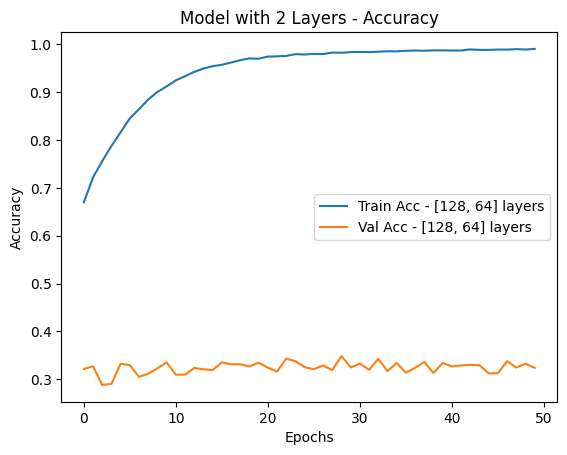

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6435 - loss: 0.8099 - val_accuracy: 0.3059 - val_loss: 1.4602
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7276 - loss: 0.6544 - val_accuracy: 0.3242 - val_loss: 1.6844
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7769 - loss: 0.5449 - val_accuracy: 0.3376 - val_loss: 1.8528
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8286 - loss: 0.4311 - val_accuracy: 0.3164 - val_loss: 2.3497
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8740 - loss: 0.3226 - val_accuracy: 0.3184 - val_loss: 2.9419
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9093 - loss: 0.2337 - val_accuracy: 0.3337 - val_loss: 3.2203
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9355 - loss: 0.1737 - val_accuracy: 0.3195 - val_loss: 4.2910
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9503 - loss: 0.1352 - 

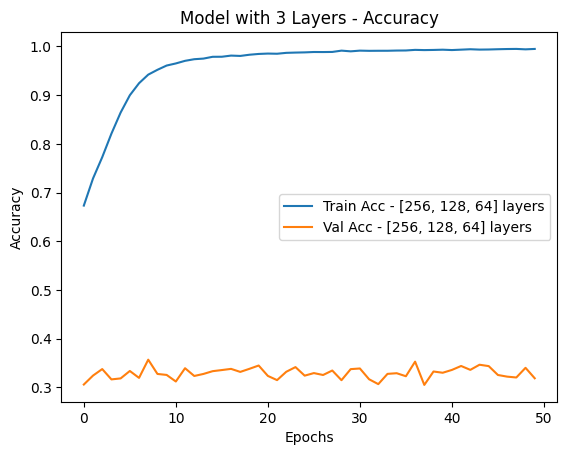

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6379 - loss: 0.8151 - val_accuracy: 0.2995 - val_loss: 1.6956
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7372 - loss: 0.6277 - val_accuracy: 0.2839 - val_loss: 1.9066
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8015 - loss: 0.4854 - val_accuracy: 0.3190 - val_loss: 2.1576
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8798 - loss: 0.3134 - val_accuracy: 0.3387 - val_loss: 2.6763
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9258 - loss: 0.2045 - val_accuracy: 0.3261 - val_loss: 3.2971
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9516 - loss: 0.1334 - val_accuracy: 0.3318 - val_loss: 4.3996
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9642 - loss: 0.0981 - val_accuracy: 0.3720 - val_loss: 4.1580
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9719 - loss: 0

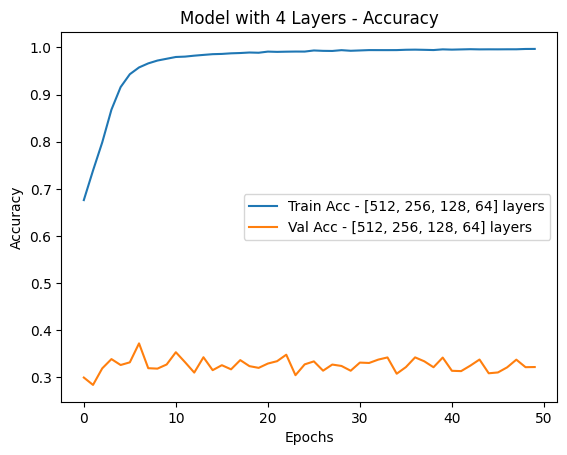

In [ ]:
# Code cell

def build_and_train_model_with_layers(layer_config, epochs=50):
    model = Sequential()
    model.add(Dense(layer_config[0], activation='relu', input_shape=(462,)))
    for nodes in layer_config[1:]:
        model.add(Dense(nodes, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_valid, y_valid))
    return history


layer_configs = [[64], [128, 64], [256, 128, 64], [512, 256, 128, 64]]
for config in layer_configs:
    history = build_and_train_model_with_layers(config)
    plt.plot(history.history['accuracy'], label=f'Train Acc - {config} layers')
    plt.plot(history.history['val_accuracy'], label=f'Val Acc - {config} layers')
    plt.title(f'Model with {len(config)} Layers - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


    - **Activation function**.

        - Present results for one of the configurations mentioned above by varying the activation function. Test at least `relu` (the default) and `sigmoid`. The choice of the specific model, including the number of layers and nodes, is at your discretion. Document your observations accordingly.

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6242 - loss: 0.8316 - val_accuracy: 0.2928 - val_loss: 1.6141
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7007 - loss: 0.7104 - val_accuracy: 0.2805 - val_loss: 1.6863
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7369 - loss: 0.6359 - val_accuracy: 0.3113 - val_loss: 1.7614
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7601 - loss: 0.5862 - val_accuracy: 0.2735 - val_loss: 1.9612
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7780 - loss: 0.5472 - val_accuracy: 0.3376 - val_loss: 1.9021
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7954 - loss: 0.5092 - val_accuracy: 0.3120 - val_loss: 2.0226
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8077 - loss: 0.4780 - val_accuracy: 0.3020 - val_loss: 2.2759
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8251 - loss: 0.4466 - 

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5770 - loss: 0.9074 - val_accuracy: 0.3137 - val_loss: 1.6277
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6883 - loss: 0.7390 - val_accuracy: 0.3219 - val_loss: 1.5616
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6891 - loss: 0.7356 - val_accuracy: 0.3044 - val_loss: 1.6087
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6917 - loss: 0.7310 - val_accuracy: 0.3160 - val_loss: 1.5604
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6908 - loss: 0.7346 - val_accuracy: 0.3152 - val_loss: 1.5712
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6918 - loss: 0.7304 - val_accuracy: 0.2724 - val_loss: 1.6658
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6961 - loss: 0.7267 - val_accuracy: 0.2823 - val_loss: 1.6971
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6940 - loss: 0.7257 - 

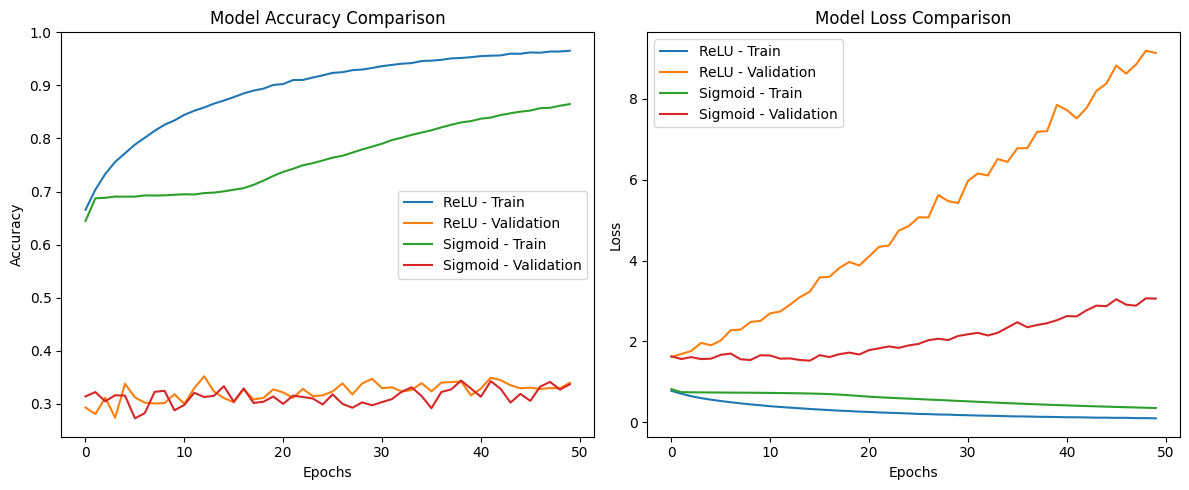

In [ ]:
# Code cell

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


def build_and_train_model(activation_function, epochs=50):
    model = Sequential([
        Dense(64, activation=activation_function, input_shape=(462,)),
        Dense(64, activation=activation_function),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_valid, y_valid))
    return history

# ReLU activation
relu_history = build_and_train_model('relu')

# Sigmoid activation
sigmoid_history = build_and_train_model('sigmoid')

# Plotting results for comparison
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(relu_history.history['accuracy'], label='ReLU - Train')
plt.plot(relu_history.history['val_accuracy'], label='ReLU - Validation')
plt.plot(sigmoid_history.history['accuracy'], label='Sigmoid - Train')
plt.plot(sigmoid_history.history['val_accuracy'], label='Sigmoid - Validation')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(relu_history.history['loss'], label='ReLU - Train')
plt.plot(relu_history.history['val_loss'], label='ReLU - Validation')
plt.plot(sigmoid_history.history['loss'], label='Sigmoid - Train')
plt.plot(sigmoid_history.history['val_loss'], label='Sigmoid - Validation')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


    - **Regularization** in neural networks is a technique used to prevent overfitting.

        - One technique involves adding a penalty to the loss function to discourage excessively complex models. Apply an `l2` penalty to some or all layers. Exercise caution, as overly aggressive penalties have been problematic in our experiments. Begin with the default `l2` value of 0.01, then reduce it to 0.001 and 1e-4. Select a specific model from the above experiments and present a case where you successfully reduced overfitting. Include a pair of graphs comparing results with and without regularization. Explain your rationale to conclude that overfitting has been reduced. Do not expect to completely eliminate overfitting. Again, this is a challenging dataset to work with.

Epoch 1/50


c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6254 - loss: 0.8291 - val_accuracy: 0.2902 - val_loss: 1.6793
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7071 - loss: 0.6997 - val_accuracy: 0.3306 - val_loss: 1.6603
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7420 - loss: 0.6258 - val_accuracy: 0.3305 - val_loss: 1.8352
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7622 - loss: 0.5765 - val_accuracy: 0.2985 - val_loss: 1.9852
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7813 - loss: 0.5375 - val_accuracy: 0.3056 - val_loss: 2.0268
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7996 - loss: 0.5001 - val_accuracy: 0.2986 - val_loss: 2.1779
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8098 - loss: 0.4703 - val_accuracy: 0.3209 - val_loss: 2.1853
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8250 - loss: 0.4437 - val_accurac

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6112 - loss: 1.1788 - val_accuracy: 0.3507 - val_loss: 1.5651
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6749 - loss: 0.8443 - val_accuracy: 0.2518 - val_loss: 1.7771
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6789 - loss: 0.8204 - val_accuracy: 0.3457 - val_loss: 1.4429
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6808 - loss: 0.8112 - val_accuracy: 0.3394 - val_loss: 1.5538
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6807 - loss: 0.8055 - val_accuracy: 0.2927 - val_loss: 1.6176
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6859 - loss: 0.7946 - val_accuracy: 0.2894 - val_loss: 1.6363
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6905 - loss: 0.7898 - val_accuracy: 0.3009 - val_loss: 1.6122
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6874 - loss: 0.7887 - val_accurac

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6241 - loss: 0.9459 - val_accuracy: 0.3313 - val_loss: 1.5484
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6947 - loss: 0.7787 - val_accuracy: 0.3464 - val_loss: 1.6315
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7174 - loss: 0.7362 - val_accuracy: 0.3085 - val_loss: 1.6906
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7279 - loss: 0.7105 - val_accuracy: 0.2994 - val_loss: 1.7521
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7386 - loss: 0.6908 - val_accuracy: 0.2979 - val_loss: 1.8007
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7431 - loss: 0.6815 - val_accuracy: 0.3121 - val_loss: 1.8097
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7496 - loss: 0.6707 - val_accuracy: 0.2871 - val_loss: 1.8751
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7533 - loss: 0.6659 - 

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6226 - loss: 0.8526 - val_accuracy: 0.3036 - val_loss: 1.6245
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7048 - loss: 0.7283 - val_accuracy: 0.3093 - val_loss: 1.7212
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7321 - loss: 0.6703 - val_accuracy: 0.3086 - val_loss: 1.7211
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7530 - loss: 0.6276 - val_accuracy: 0.3101 - val_loss: 1.8578
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7699 - loss: 0.5939 - val_accuracy: 0.2902 - val_loss: 1.9826
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7872 - loss: 0.5581 - val_accuracy: 0.3218 - val_loss: 1.9820
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8033 - loss: 0.5313 - val_accuracy: 0.2929 - val_loss: 2.2464
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8106 - loss: 0.5133 - val_accurac

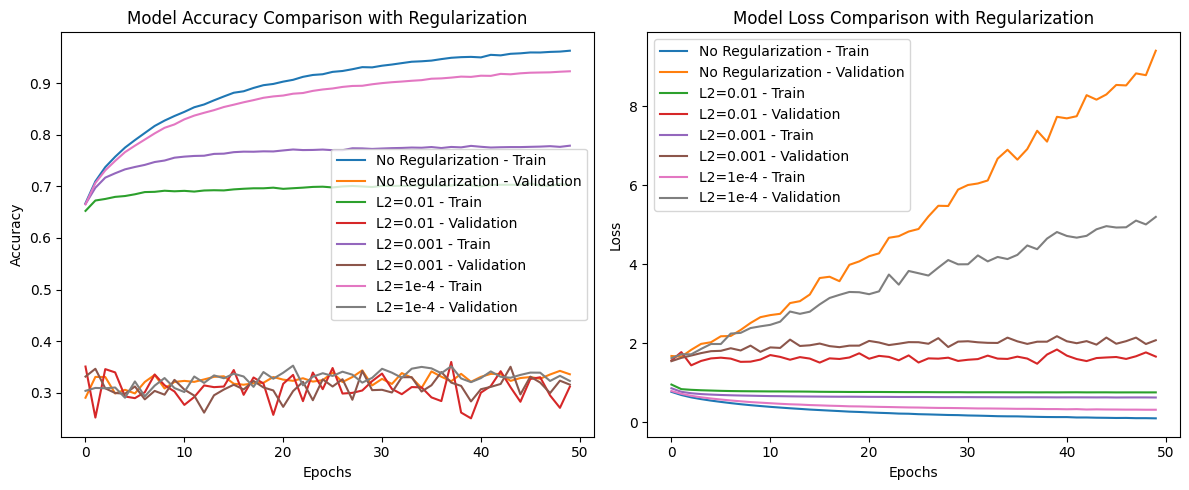

In [ ]:
# Code cell

from keras.regularizers import l2

#  L2 regularization
def build_and_train_model_with_regularization(activation_function, l2_penalty, epochs=50):
    model = Sequential([
        Dense(64, activation=activation_function, input_shape=(462,), kernel_regularizer=l2(l2_penalty)),
        Dense(64, activation=activation_function, kernel_regularizer=l2(l2_penalty)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_valid, y_valid))
    return history

#  without regularization
no_regularization_history = build_and_train_model_with_regularization('relu', l2_penalty=0)

# with L2 regularization (l2 = 0.01)
l2_01_history = build_and_train_model_with_regularization('relu', l2_penalty=0.01)

#  L2 regularization (l2 = 0.001)
l2_001_history = build_and_train_model_with_regularization('relu', l2_penalty=0.001)

# L2 regularization (l2 = 1e-4)
l2_1e4_history = build_and_train_model_with_regularization('relu', l2_penalty=1e-4)


plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(no_regularization_history.history['accuracy'], label='No Regularization - Train')
plt.plot(no_regularization_history.history['val_accuracy'], label='No Regularization - Validation')
plt.plot(l2_01_history.history['accuracy'], label='L2=0.01 - Train')
plt.plot(l2_01_history.history['val_accuracy'], label='L2=0.01 - Validation')
plt.plot(l2_001_history.history['accuracy'], label='L2=0.001 - Train')
plt.plot(l2_001_history.history['val_accuracy'], label='L2=0.001 - Validation')
plt.plot(l2_1e4_history.history['accuracy'], label='L2=1e-4 - Train')
plt.plot(l2_1e4_history.history['val_accuracy'], label='L2=1e-4 - Validation')
plt.title('Model Accuracy Comparison with Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(no_regularization_history.history['loss'], label='No Regularization - Train')
plt.plot(no_regularization_history.history['val_loss'], label='No Regularization - Validation')
plt.plot(l2_01_history.history['loss'], label='L2=0.01 - Train')
plt.plot(l2_01_history.history['val_loss'], label='L2=0.01 - Validation')
plt.plot(l2_001_history.history['loss'], label='L2=0.001 - Train')
plt.plot(l2_001_history.history['val_loss'], label='L2=0.001 - Validation')
plt.plot(l2_1e4_history.history['loss'], label='L2=1e-4 - Train')
plt.plot(l2_1e4_history.history['val_loss'], label='L2=1e-4 - Validation')
plt.title('Model Loss Comparison with Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


        - Dropout layers are a regularization technique in neural networks where a random subset of neurons is temporarily removed during training. This helps prevent overfitting by promoting redundancy and improving the network's ability to generalize to new data. Select a specific model from the above experiments where you have muliple layers and experiment adding one or of few dropout layers into your network. Experiment with two different rates, say 0.25 and 0.5. Document your observations.

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6249 - loss: 0.8323 - val_accuracy: 0.2995 - val_loss: 1.6924
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6979 - loss: 0.7101 - val_accuracy: 0.3407 - val_loss: 1.5055
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7342 - loss: 0.6420 - val_accuracy: 0.3060 - val_loss: 1.7924
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7589 - loss: 0.5909 - val_accuracy: 0.3032 - val_loss: 1.9161
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7822 - loss: 0.5387 - val_accuracy: 0.2998 - val_loss: 1.9794
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7930 - loss: 0.5111 - val_accuracy: 0.3093 - val_loss: 2.1447
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8107 - loss: 0.4727 - val_accuracy: 0.3005 - val_loss: 2.1474
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8216 - loss: 0.4483 - 

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5945 - loss: 0.8806 - val_accuracy: 0.3109 - val_loss: 1.5195
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6874 - loss: 0.7444 - val_accuracy: 0.3232 - val_loss: 1.4953
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7090 - loss: 0.7008 - val_accuracy: 0.3031 - val_loss: 1.6504
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7254 - loss: 0.6635 - val_accuracy: 0.3016 - val_loss: 1.7229
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7426 - loss: 0.6296 - val_accuracy: 0.3192 - val_loss: 1.7233
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7503 - loss: 0.6110 - val_accuracy: 0.2896 - val_loss: 1.7802
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7581 - loss: 0.5956 - val_accuracy: 0.3031 - val_loss: 1.8113
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7650 - loss: 0.5760 - 

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5375 - loss: 0.9503 - val_accuracy: 0.2954 - val_loss: 1.4346
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6761 - loss: 0.7762 - val_accuracy: 0.2950 - val_loss: 1.5094
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6870 - loss: 0.7491 - val_accuracy: 0.3085 - val_loss: 1.4907
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7002 - loss: 0.7287 - val_accuracy: 0.2932 - val_loss: 1.6082
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7059 - loss: 0.7130 - val_accuracy: 0.2850 - val_loss: 1.6396
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7144 - loss: 0.6957 - val_accuracy: 0.2971 - val_loss: 1.6484
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7163 - loss: 0.6887 - val_accuracy: 0.2950 - val_loss: 1.7426
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7221 - loss: 0.6737 - val_accurac

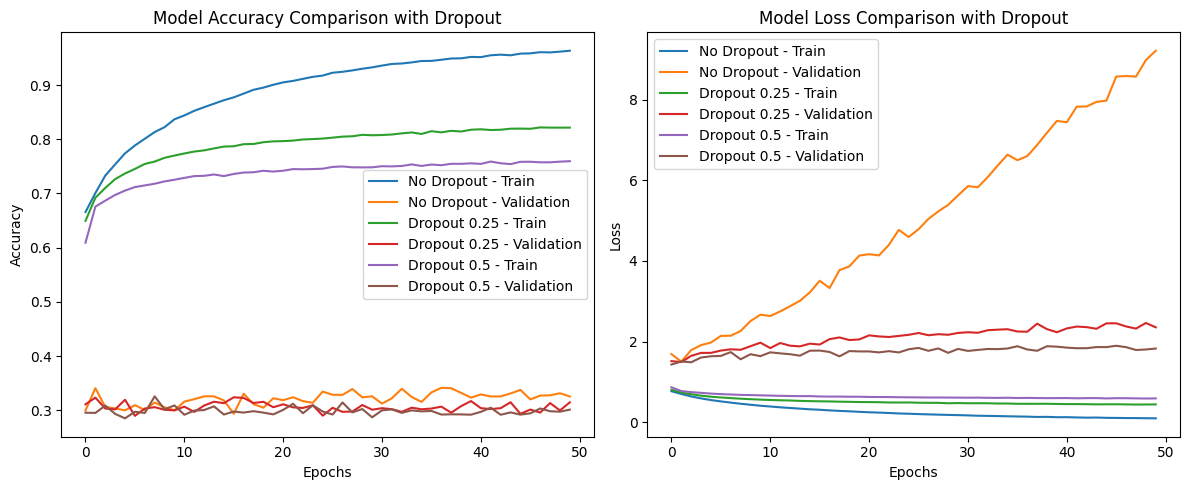

In [ ]:
# Code cell

from keras.layers import Dropout

#  with Dropout layers
def build_and_train_model_with_dropout(activation_function, dropout_rate, epochs=50):
    model = Sequential([
        Dense(64, activation=activation_function, input_shape=(462,)),
        Dropout(dropout_rate),
        Dense(64, activation=activation_function),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_valid, y_valid))
    return history

#  model without dropout
no_dropout_history = build_and_train_model_with_dropout('relu', dropout_rate=0)

#  with Dropout rate = 0.25
dropout_025_history = build_and_train_model_with_dropout('relu', dropout_rate=0.25)

# with Dropout rate = 0.5
dropout_05_history = build_and_train_model_with_dropout('relu', dropout_rate=0.5)


plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(no_dropout_history.history['accuracy'], label='No Dropout - Train')
plt.plot(no_dropout_history.history['val_accuracy'], label='No Dropout - Validation')
plt.plot(dropout_025_history.history['accuracy'], label='Dropout 0.25 - Train')
plt.plot(dropout_025_history.history['val_accuracy'], label='Dropout 0.25 - Validation')
plt.plot(dropout_05_history.history['accuracy'], label='Dropout 0.5 - Train')
plt.plot(dropout_05_history.history['val_accuracy'], label='Dropout 0.5 - Validation')
plt.title('Model Accuracy Comparison with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(no_dropout_history.history['loss'], label='No Dropout - Train')
plt.plot(no_dropout_history.history['val_loss'], label='No Dropout - Validation')
plt.plot(dropout_025_history.history['loss'], label='Dropout 0.25 - Train')
plt.plot(dropout_025_history.history['val_loss'], label='Dropout 0.25 - Validation')
plt.plot(dropout_05_history.history['loss'], label='Dropout 0.5 - Train')
plt.plot(dropout_05_history.history['val_loss'], label='Dropout 0.5 - Validation')
plt.title('Model Loss Comparison with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


        - Summarize your experiments with using a graphical representation such as Figure 6.15 [on this page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).

YOU HAVE TO SUMMARUZE THE EXPERIENCE HERE!!!

In [22]:
print(dropout_025_history)
print(type(dropout_025_history))

<class 'keras.src.callbacks.history.History'>


{'accuracy': [0.6494252681732178, 0.69215989112854, 0.7101904153823853, 0.7265053987503052, 0.7369360327720642, 0.7453422546386719, 0.7545204758644104, 0.7589294910430908, 0.765860378742218, 0.7700120210647583, 0.7738720178604126, 0.7774060964584351, 0.7795848250389099, 0.7831875085830688, 0.7865843176841736, 0.7872190475463867, 0.790993332862854, 0.7914050221443176, 0.7946302890777588, 0.7962429523468018, 0.7966546416282654, 0.7976496815681458, 0.7997426390647888, 0.8004117608070374, 0.8013895750045776, 0.8030536770820618, 0.8049922585487366, 0.8055927157402039, 0.8083032965660095, 0.8074798583984375, 0.8079258799552917, 0.8088865876197815, 0.8110138773918152, 0.8126265406608582, 0.8098816275596619, 0.8150283098220825, 0.8128324151039124, 0.815680205821991, 0.8143935203552246, 0.817687451839447, 0.818510890007019, 0.8171384334564209, 0.817687451839447, 0.8195917010307312, 0.8197804093360901, 0.8194201588630676, 0.8219763040542603, 0.8216160535812378, 0.8215817213058472, 0.821616053581

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6027 - loss: 1.1840 - val_accuracy: 0.3361 - val_loss: 1.4612
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6745 - loss: 0.8442 - val_accuracy: 0.2719 - val_loss: 1.6235
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6800 - loss: 0.8210 - val_accuracy: 0.3153 - val_loss: 1.5437
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6811 - loss: 0.8040 - val_accuracy: 0.3018 - val_loss: 1.5959
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6845 - loss: 0.7982 - val_accuracy: 0.3450 - val_loss: 1.5135
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6879 - loss: 0.7944 - val_accuracy: 0.3022 - val_loss: 1.6590
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6951 - loss: 0.7843 - val_accuracy: 0.3519 - val_loss: 1.5684
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7018 - loss: 0.7722 - 

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6246 - loss: 0.8315 - val_accuracy: 0.3082 - val_loss: 1.5737
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7059 - loss: 0.7019 - val_accuracy: 0.2898 - val_loss: 1.7254
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7366 - loss: 0.6369 - val_accuracy: 0.2851 - val_loss: 1.9657
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7568 - loss: 0.5907 - val_accuracy: 0.3305 - val_loss: 1.7460
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7807 - loss: 0.5405 - val_accuracy: 0.3287 - val_loss: 1.9276
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7937 - loss: 0.5068 - val_accuracy: 0.3165 - val_loss: 2.0690
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8108 - loss: 0.4746 - val_accuracy: 0.3256 - val_loss: 2.0838
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8221 - loss: 0.4482 - val_accurac

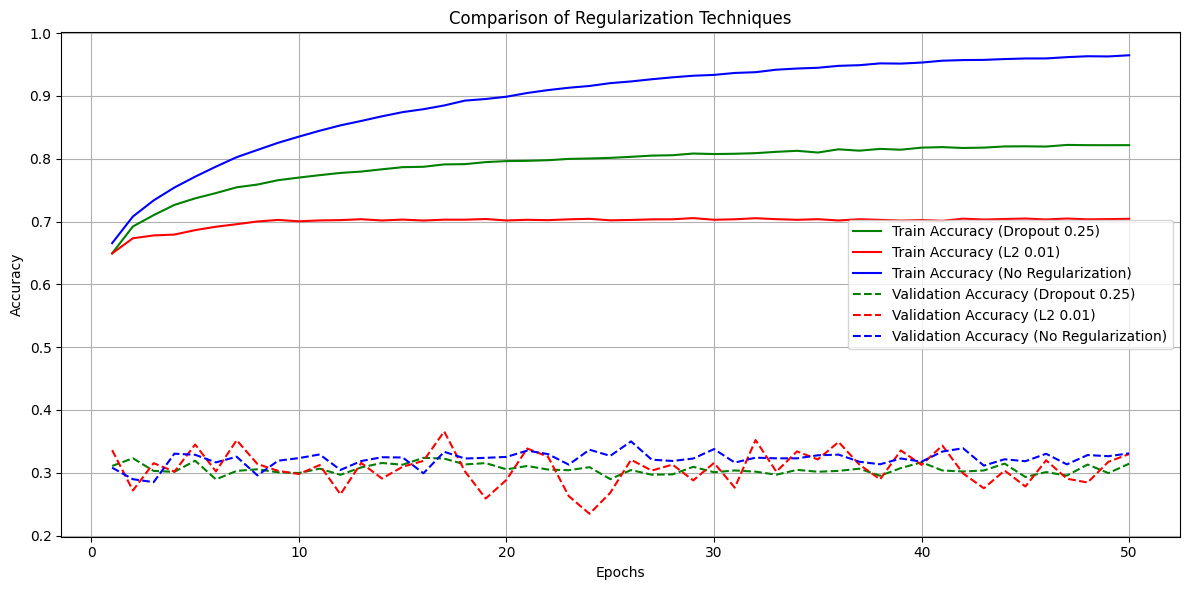

In [ ]:
if hasattr(dropout_025_history, 'history'):
    print(dropout_025_history.history)  # Verify the content of history

# extracting training and validation accuracies from the History object
train_acc_dropout_025 = dropout_025_history.history.get('accuracy', [])
val_acc_dropout_025 = dropout_025_history.history.get('val_accuracy', [])

l2_01_history = build_and_train_model_with_regularization('relu', l2_penalty=0.01, epochs= 50)


train_acc_l2_01 = l2_01_history.history.get('accuracy', [])
val_acc_l2_01 = l2_01_history.history.get('val_accuracy', [])

no_regularization_history = build_and_train_model_with_regularization('relu', l2_penalty=0, epochs=50)

train_acc_no_reg = no_regularization_history.history.get('accuracy', [])
val_acc_no_reg = no_regularization_history.history.get('val_accuracy', [])


plt.figure(figsize=(12, 6))

# epochs range based on the length of your training history
epochs = range(1, len(train_acc_dropout_025) + 1)

# training accuracy for each model
plt.plot(epochs, train_acc_dropout_025, label="Train Accuracy (Dropout 0.25)", color='green', linestyle='solid')
plt.plot(epochs, train_acc_l2_01, label="Train Accuracy (L2 0.01)", color='red', linestyle='solid')
plt.plot(epochs, train_acc_no_reg, label="Train Accuracy (No Regularization)", color='blue', linestyle='solid')

# validation accuracy for each model
plt.plot(epochs, val_acc_dropout_025, label="Validation Accuracy (Dropout 0.25)", color='green', linestyle='dashed')
plt.plot(epochs, val_acc_l2_01, label="Validation Accuracy (L2 0.01)", color='red', linestyle='dashed')
plt.plot(epochs, val_acc_no_reg, label="Validation Accuracy (No Regularization)", color='blue', linestyle='dashed')

#labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Regularization Techniques')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

        - Early stopping is a regularization technique in neural network training wherein the process is halted when validation set performance starts to decline, thus preventing overfitting by avoiding the learning of noise in the training data. From all the experiments conducted thus far, choose **one** configuration (the number of layers, number of nodes, activation function, L2 penalty, and dropout layers) that yielded the best performance. Use a graph of loss and accuracy to determine the optimal number of training iterations for this network. What is the optimal number of epochs for this network configuration and why?

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5946 - loss: 0.8791 - val_accuracy: 0.3186 - val_loss: 1.4279
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6939 - loss: 0.7369 - val_accuracy: 0.3060 - val_loss: 1.5984
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7119 - loss: 0.6943 - val_accuracy: 0.2967 - val_loss: 1.5745
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7317 - loss: 0.6540 - val_accuracy: 0.2886 - val_loss: 1.6996
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7480 - loss: 0.6182 - val_accuracy: 0.3066 - val_loss: 1.7282
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7568 - loss: 0.5985 - val_accuracy: 0.3078 - val_loss: 1.8271
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7656 - loss: 0.5782 - val_accuracy: 0.3049 - val_loss: 1.8211
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7687 - loss: 0.5710 - 

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6121 - loss: 1.1843 - val_accuracy: 0.2804 - val_loss: 1.6705
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6700 - loss: 0.8493 - val_accuracy: 0.3602 - val_loss: 1.3940
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6771 - loss: 0.8229 - val_accuracy: 0.3094 - val_loss: 1.5529
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6778 - loss: 0.8092 - val_accuracy: 0.3305 - val_loss: 1.5036
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6863 - loss: 0.7998 - val_accuracy: 0.3562 - val_loss: 1.4406
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6894 - loss: 0.7939 - val_accuracy: 0.3677 - val_loss: 1.4525
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6895 - loss: 0.7925 - val_accuracy: 0.3232 - val_loss: 1.5315
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6982 - loss: 0.7859 - 

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6273 - loss: 0.8281 - val_accuracy: 0.3283 - val_loss: 1.5201
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7031 - loss: 0.7019 - val_accuracy: 0.3051 - val_loss: 1.6382
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7378 - loss: 0.6331 - val_accuracy: 0.2945 - val_loss: 1.8206
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7596 - loss: 0.5827 - val_accuracy: 0.2751 - val_loss: 1.9828
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7786 - loss: 0.5420 - val_accuracy: 0.2927 - val_loss: 2.0462
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7958 - loss: 0.5047 - val_accuracy: 0.3091 - val_loss: 2.1487
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8100 - loss: 0.4736 - val_accuracy: 0.3197 - val_loss: 2.2335
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8199 - loss: 0.4499 - 

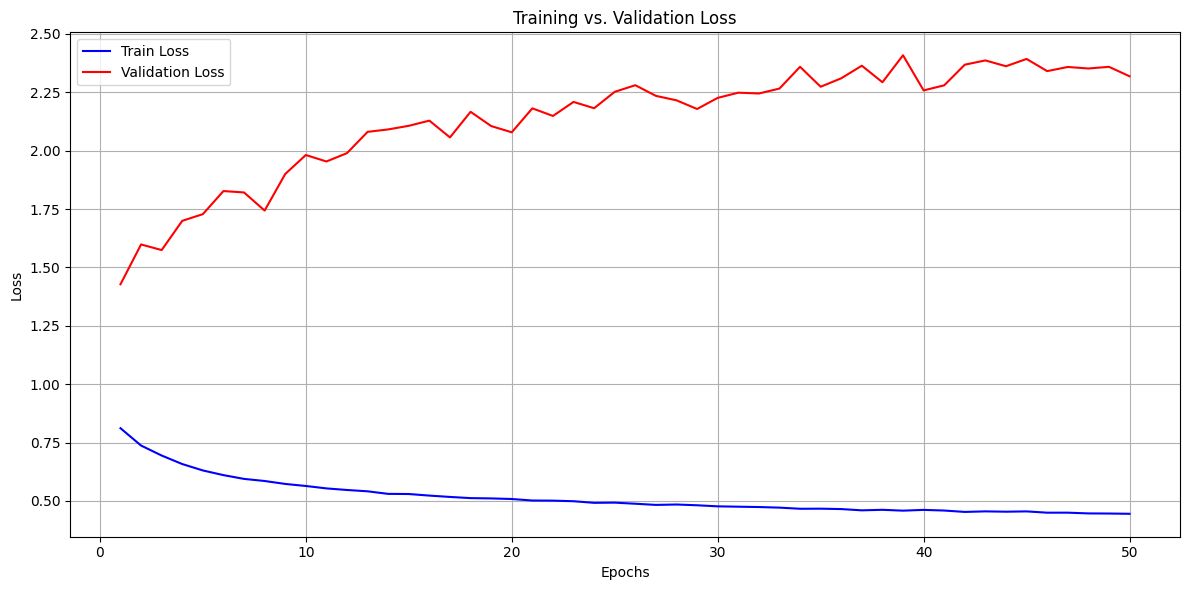

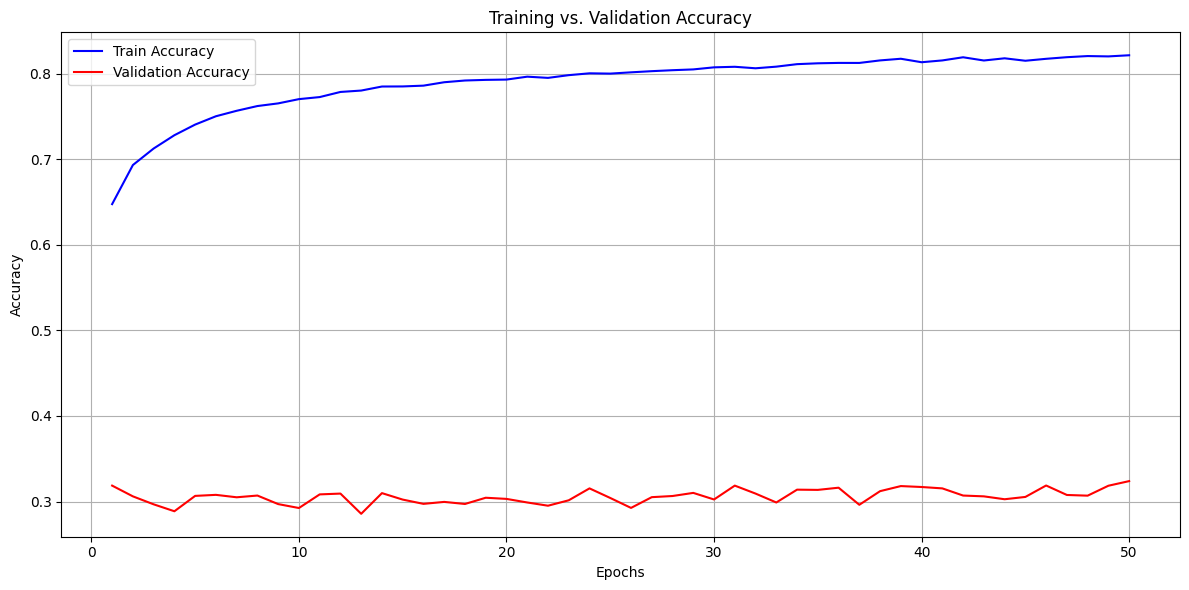

The optimal number of epochs is: 50


In [24]:
# Code cell

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Assuming you have the following history objects (replace with actual models)
# These are the history objects from your experiments with dropout, L2 regularization, etc.
dropout_025_history = build_and_train_model_with_dropout('relu', dropout_rate=0.25)
l2_01_history = build_and_train_model_with_regularization('relu', l2_penalty=0.01)
no_reg_history = build_and_train_model_with_regularization('relu', l2_penalty=0, epochs=50)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train with early stopping (adjust based on your best model, here we use dropout 0.25 model)
# You can replace this with the model configuration of your choice
history = dropout_025_history  # Replace with the best model history, e.g., l2_01_history

# Extract history for loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Determine the optimal number of epochs
optimal_epochs = len(train_loss)  # The number of epochs trained before early stopping
print(f"The optimal number of epochs is: {optimal_epochs}")


### Test

9. **Model Comparison**:

    - Evaluate the baseline model on the test set, using the optimal parameter set identified through grid search. Additionally, apply your best-performing neural network configuration to the test set.

    - Quantify the performance of the baseline model (best hyperparameter configuration) and your neural network (best configuration) using precision, recall, and F1-score as metrics. How do these two models compare to the dummy model?

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

In [31]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Data type of X_train:", type(X_train))
print("Data type of X_test:", type(X_test))

# Ensure the data type is consistent
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()

# Check if there are any non-numerical values
if not np.issubdtype(X_test.dtype, np.number):
    print("Converting X_test to a numeric type...")
    X_test = X_test.astype(float)

y_test = y_test.astype(int)
y_pred_dt = y_pred_dt.astype(int)

X_train shape: (58290, 462)
X_test shape: (7431, 462)
Data type of X_train: <class 'pandas.core.frame.DataFrame'>
Data type of X_test: <class 'numpy.ndarray'>


In [ ]:
# Code cell
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


dt_model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# classification report for the Decision Tree model
print("Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.68      0.82      0.74      4380
           1       0.00      0.00      0.00      3051
           2       0.00      0.00      0.00         0

    accuracy                           0.49      7431
   macro avg       0.23      0.27      0.25      7431
weighted avg       0.40      0.49      0.44      7431



c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_

In [27]:
def build_and_train_nn(X_train, y_train, X_valid, y_valid, epochs=50, num_nodes=64):
    model = Sequential([
        Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],)),  # Input size based on X_train
        Dense(3, activation='softmax')  # Assuming 3 classes in the output
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_valid, y_valid))
    
    return model, history

In [28]:
def evaluate_nn_on_test(X_test, y_test, model):
    y_pred_nn = model.predict(X_test)
    y_pred_nn = np.argmax(y_pred_nn, axis=1)  # Convert softmax probabilities to class predictions
    
    precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
    recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
    f1_nn = f1_score(y_test, y_pred_nn, average='weighted')
    
    return precision_nn, recall_nn, f1_nn, y_pred_nn

In [33]:
model_nn, history_nn = build_and_train_nn(X_train, y_train, X_valid, y_valid, epochs=50, num_nodes=64)

# Step 5: Evaluate both models on the test set
precision_dt, recall_dt, f1_dt, y_pred_dt = decision_tree_baseline(X_train, y_train, X_test, y_test)
precision_nn, recall_nn, f1_nn, y_pred_nn = evaluate_nn_on_test(X_test, y_test, model_nn)

# Print out the comparison of both models
print("Decision Tree Performance (Baseline):")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")

print("\nNeural Network Performance:")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1 Score: {f1_nn:.4f}")

c:\Users\16132\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6263 - loss: 0.8361 - val_accuracy: 0.3280 - val_loss: 1.6213
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6909 - loss: 0.7306 - val_accuracy: 0.3140 - val_loss: 1.6052
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7129 - loss: 0.6865 - val_accuracy: 0.2986 - val_loss: 1.7541
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7379 - loss: 0.6400 - val_accuracy: 0.2631 - val_loss: 1.9862
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7562 - loss: 0.5967 - val_accuracy: 0.3403 - val_loss: 1.6676
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7746 - loss: 0.5654 - val_accuracy: 0.3218 - val_loss: 1.8496
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7860 - loss: 0.5350 - val_accuracy: 0.3226 - val_loss: 1.9275
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7969 - loss: 0.5115 - 

NameError: name 'decision_tree_baseline' is not defined

In [ ]:
metrics = ['Precision', 'Recall', 'F1 Score']
decision_tree_scores = [precision_dt, recall_dt, f1_dt]
nn_scores = [precision_nn, recall_nn, f1_nn]

x = np.arange(len(metrics))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, decision_tree_scores, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, nn_scores, width, label='Neural Network (64 nodes)')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Decision Tree vs Neural Network')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Resources

- Referenced to ChatGPT for mainly Part 8 - Neural Networks, the following prompts were used:
- Can you help me design a sequential neural network model with specific input and output layers?
- What are the key steps to compile and train a neural network using Keras?
- How do I determine the optimal number of epochs for training my model?
- Can you explain how to implement L2 regularization in my Keras model?
- How do I add a dropout layer to my neural network, and what dropout rate should I start with?
- What is the best approach to compare the performance of different neural network models graphically?
- How do I create a combined graph to compare models with and without regularization?



- Referenced to ChatGPT for debugging feature happening on Model Development:
- I'm running into a ValueError in my Python code while training a model. Can you help explain what might be causing this error?
- I'm getting a ValueError that says 'Classification metrics can't handle a mix of continuous and binary targets.' Can you help me debug this and suggest how to fix it?
- Can you explain how to fix a ValueError related to dimension mismatches in TensorFlow/Keras training?
- I'm facing a KeyError while trying to access a dictionary or DataFrame column. Can you guide me on how to handle it and prevent similar errors in the future?
- I'm working with Keras and I'm trying to access the training history using history['accuracy'], but I'm getting a TypeError: 'History' object is not subscriptable. Can you help me understand the correct way to access it?"
- I'm encountering a ValueError when using precision_score(). The error message indicates that there is a mix of continuous and binary targets. How can I resolve this?

